In [1]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from collections import defaultdict
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid")

In [2]:
# Change this if your Kaggle dataset folder name differs
DATASET_ROOT = Path("/kaggle/input/cvpr-mini-project-dataset/dataset")

TRAIN_DIR = DATASET_ROOT / "train"
VAL_DIR   = DATASET_ROOT / "validation"
TEST_DIR  = DATASET_ROOT / "test"
TEMPLATE_DIR = DATASET_ROOT / "templates"

TRAIN_DIR, VAL_DIR, TEST_DIR, TEMPLATE_DIR

(PosixPath('/kaggle/input/cvpr-mini-project-dataset/dataset/train'),
 PosixPath('/kaggle/input/cvpr-mini-project-dataset/dataset/validation'),
 PosixPath('/kaggle/input/cvpr-mini-project-dataset/dataset/test'),
 PosixPath('/kaggle/input/cvpr-mini-project-dataset/dataset/templates'))

In [3]:
classes = sorted(os.listdir(TRAIN_DIR))
print("Classes found:", classes)

Classes found: ['denomination_10', 'denomination_100', 'denomination_20', 'denomination_200', 'denomination_2000', 'denomination_50', 'denomination_500', 'denomination_fake']


In [4]:
def count_images(folder):
    counts = {}
    for cls in sorted(os.listdir(folder)):
        cls_path = folder / cls
        if os.path.isdir(cls_path):
            counts[cls] = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    return counts

train_counts = count_images(TRAIN_DIR)
val_counts = count_images(VAL_DIR)
test_counts = count_images(TEST_DIR)

print("TRAIN:", train_counts)
print("VAL:", val_counts)
print("TEST:", test_counts)

TRAIN: {'denomination_10': 1030, 'denomination_100': 1495, 'denomination_20': 1237, 'denomination_200': 1262, 'denomination_2000': 1219, 'denomination_50': 1190, 'denomination_500': 1493, 'denomination_fake': 327}
VAL: {'denomination_10': 220, 'denomination_100': 320, 'denomination_20': 265, 'denomination_200': 270, 'denomination_2000': 261, 'denomination_50': 255, 'denomination_500': 320, 'denomination_fake': 70}
TEST: {'denomination_10': 222, 'denomination_100': 321, 'denomination_20': 266, 'denomination_200': 272, 'denomination_2000': 262, 'denomination_50': 256, 'denomination_500': 321, 'denomination_fake': 71}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


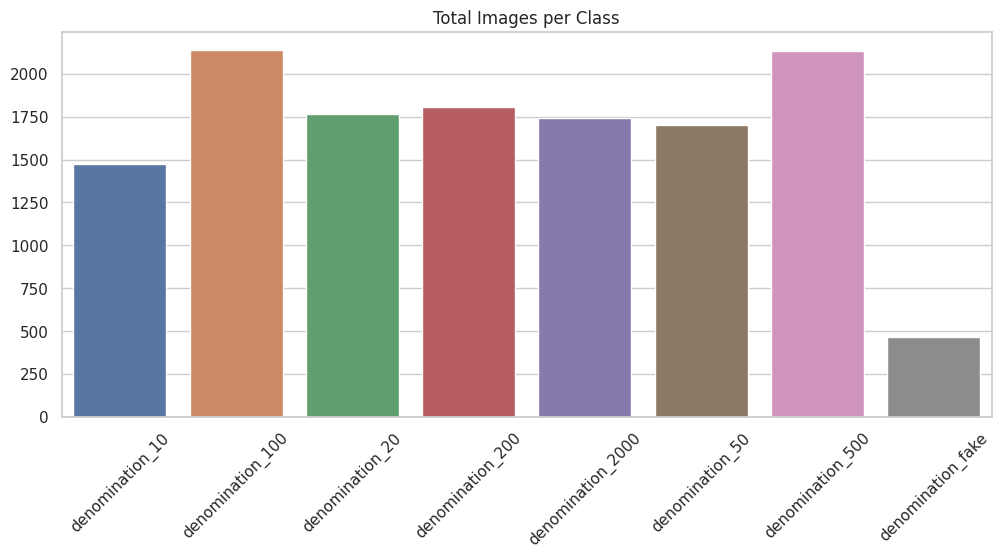

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


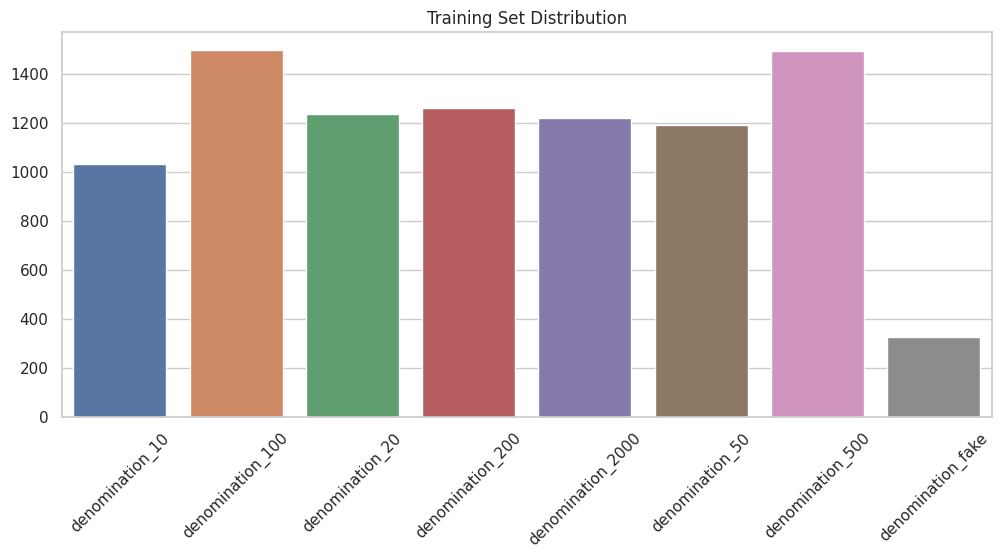

In [5]:
plt.figure(figsize=(12,5))
total_counts = {cls: train_counts.get(cls,0)+val_counts.get(cls,0)+test_counts.get(cls,0) for cls in classes}
sns.barplot(x=list(total_counts.keys()), y=list(total_counts.values()))
plt.title("Total Images per Class")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Training Set Distribution")
plt.xticks(rotation=45)
plt.show()

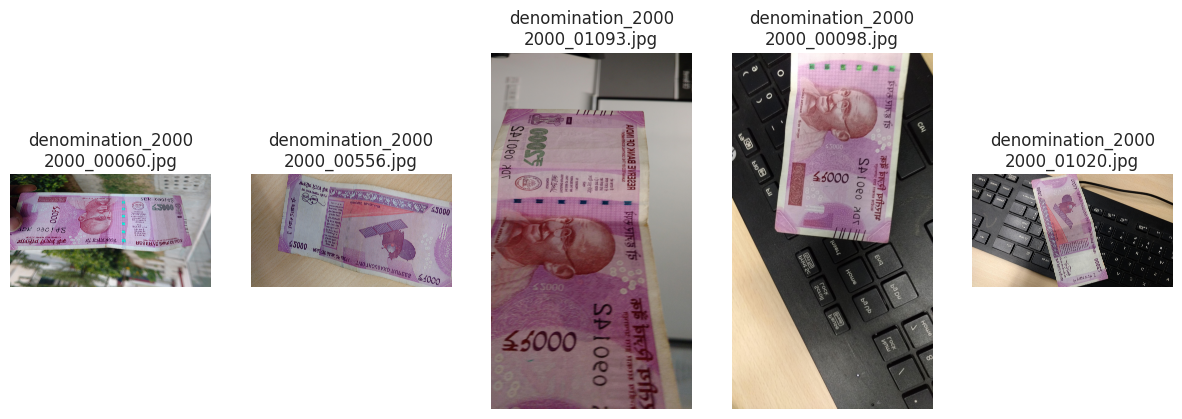

In [6]:
import random

def show_random_images(folder, num=5):
    plt.figure(figsize=(15,5))
    
    cls = random.choice(os.listdir(folder))
    cls_folder = folder / cls
    imgs = [f for f in os.listdir(cls_folder) if f.endswith(".jpg")]
    imgs = random.sample(imgs, min(num, len(imgs)))

    for i, imgname in enumerate(imgs):
        img_path = cls_folder / imgname
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.title(f"{cls}\n{imgname}")
        plt.axis("off")

show_random_images(TRAIN_DIR, num=5)

In [7]:
shapes = defaultdict(int)

for cls in classes:
    cls_path = TRAIN_DIR / cls
    imgs = os.listdir(cls_path)
    for img_file in imgs[:50]:  # sample 50 per class
        img = cv2.imread(str(cls_path / img_file))
        if img is not None:
            shapes[img.shape] += 1

print("Image shape distribution (sampled):")
for k, v in shapes.items():
    print(k, "→", v)

Image shape distribution (sampled):
(1200, 1600, 3) → 58
(4032, 3024, 3) → 4
(1600, 1200, 3) → 30
(3456, 4608, 3) → 5
(451, 438, 3) → 1
(1536, 2048, 3) → 8
(5344, 3006, 3) → 84
(2592, 1944, 3) → 2
(3006, 5344, 3) → 86
(3072, 4096, 3) → 1
(1280, 960, 3) → 17
(2048, 1536, 3) → 8
(3468, 4624, 3) → 10
(4624, 3468, 3) → 22
(1944, 2592, 3) → 3
(451, 437, 3) → 1
(9248, 6936, 3) → 2
(392, 393, 3) → 1
(4624, 2068, 3) → 8
(960, 1280, 3) → 2
(224, 224, 3) → 30
(762, 1280, 3) → 1
(1580, 939, 3) → 1
(1280, 980, 3) → 2
(1223, 1529, 3) → 1
(1180, 1280, 3) → 1
(1280, 779, 3) → 1
(1600, 725, 3) → 1
(1000, 1000, 3) → 2
(1600, 1219, 3) → 1
(1280, 841, 3) → 1
(1280, 911, 3) → 1
(1600, 1142, 3) → 1
(999, 1280, 3) → 1
(1280, 681, 3) → 1
(622, 1530, 3) → 1


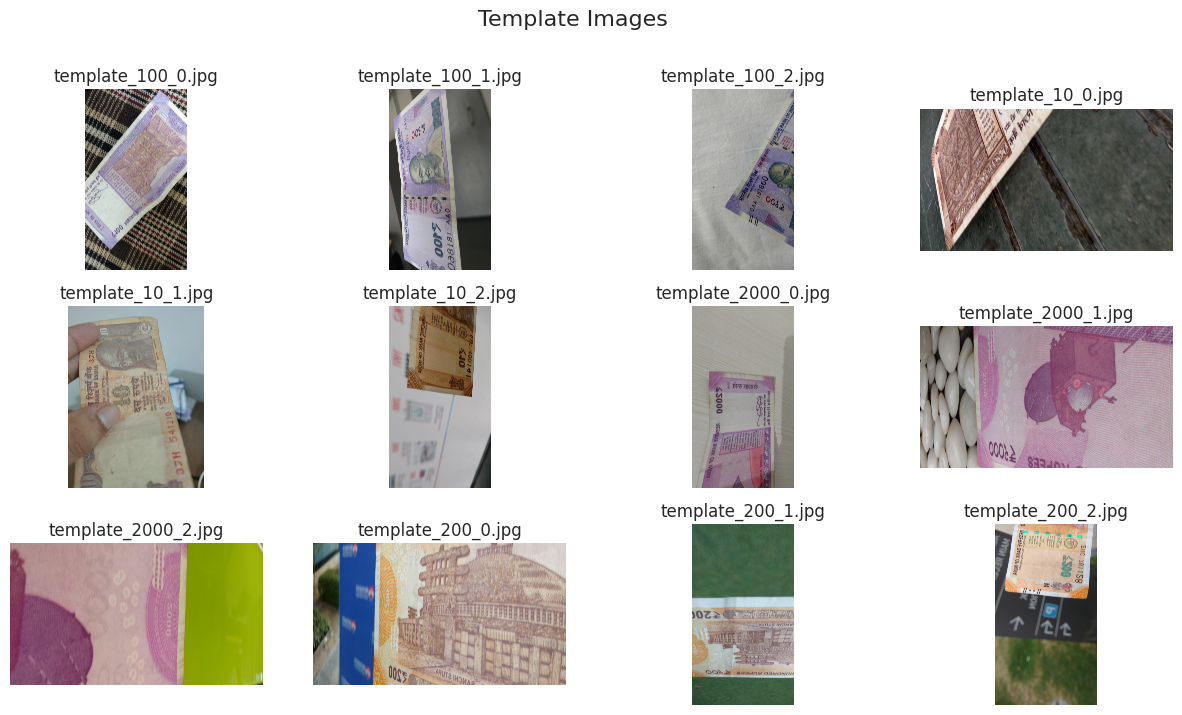

In [8]:
template_files = sorted(os.listdir(TEMPLATE_DIR))

plt.figure(figsize=(15, 8))

for i, filename in enumerate(template_files[:12]):  # show 12 samples
    img = cv2.imread(str(TEMPLATE_DIR / filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(filename)
    plt.axis("off")

plt.suptitle("Template Images", fontsize=16)
plt.show()

In [9]:
def check_corrupted(folder):
    corrupted = []
    for cls in os.listdir(folder):
        cls_path = folder / cls
        for img_file in os.listdir(cls_path):
            img_path = cls_path / img_file
            try:
                img = Image.open(img_path)
                img.verify()
            except:
                corrupted.append(str(img_path))
    return corrupted

bad_imgs = check_corrupted(TRAIN_DIR)
bad_imgs += check_corrupted(VAL_DIR)
bad_imgs += check_corrupted(TEST_DIR)

print("Corrupted images found:", len(bad_imgs))
bad_imgs[:10]

Corrupted images found: 0


[]

In [10]:
summary = {
    "total_images": sum(total_counts.values()),
    "num_classes": len(classes),
    "classes": classes,
    "train_distribution": train_counts,
    "validation_distribution": val_counts,
    "test_distribution": test_counts,
    "template_count": len(os.listdir(TEMPLATE_DIR))
}

summary

{'total_images': 13225,
 'num_classes': 8,
 'classes': ['denomination_10',
  'denomination_100',
  'denomination_20',
  'denomination_200',
  'denomination_2000',
  'denomination_50',
  'denomination_500',
  'denomination_fake'],
 'train_distribution': {'denomination_10': 1030,
  'denomination_100': 1495,
  'denomination_20': 1237,
  'denomination_200': 1262,
  'denomination_2000': 1219,
  'denomination_50': 1190,
  'denomination_500': 1493,
  'denomination_fake': 327},
 'validation_distribution': {'denomination_10': 220,
  'denomination_100': 320,
  'denomination_20': 265,
  'denomination_200': 270,
  'denomination_2000': 261,
  'denomination_50': 255,
  'denomination_500': 320,
  'denomination_fake': 70},
 'test_distribution': {'denomination_10': 222,
  'denomination_100': 321,
  'denomination_20': 266,
  'denomination_200': 272,
  'denomination_2000': 262,
  'denomination_50': 256,
  'denomination_500': 321,
  'denomination_fake': 71},
 'template_count': 22}